In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from statsmodels.stats.outliers_influence import variance_inflation_factor
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import skew
import warnings
from sklearn.impute import SimpleImputer
from scipy import stats
from sklearn.feature_extraction.text import CountVectorizer
import os

In [121]:
df = pd.read_csv("cyber threat.csv")

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              476 non-null    int64  
 1   text            476 non-null    object 
 2   relations       476 non-null    object 
 3   diagnosis       475 non-null    object 
 4   solutions       476 non-null    object 
 5   id_1            476 non-null    int64  
 6   label_1         476 non-null    object 
 7   start_offset_1  476 non-null    int64  
 8   end_offset_1    476 non-null    int64  
 9   id_2            476 non-null    int64  
 10  label_2         476 non-null    object 
 11  start_offset_2  476 non-null    int64  
 12  end_offset_2    476 non-null    int64  
 13  id_3            329 non-null    float64
 14  label_3         329 non-null    object 
 15  start_offset_3  329 non-null    float64
 16  end_offset_3    329 non-null    float64
dtypes: float64(3), int64(7), object(7)


In [123]:
df.isnull().sum()

id                  0
text                0
relations           0
diagnosis           1
solutions           0
id_1                0
label_1             0
start_offset_1      0
end_offset_1        0
id_2                0
label_2             0
start_offset_2      0
end_offset_2        0
id_3              147
label_3           147
start_offset_3    147
end_offset_3      147
dtype: int64

In [124]:
df.isnull().mean() * 100

id                 0.000000
text               0.000000
relations          0.000000
diagnosis          0.210084
solutions          0.000000
id_1               0.000000
label_1            0.000000
start_offset_1     0.000000
end_offset_1       0.000000
id_2               0.000000
label_2            0.000000
start_offset_2     0.000000
end_offset_2       0.000000
id_3              30.882353
label_3           30.882353
start_offset_3    30.882353
end_offset_3      30.882353
dtype: float64

In [125]:
df.dropna(subset=['diagnosis'], inplace=True)

In [126]:
df.head()

,id,text,relations,diagnosis,solutions,id_1,label_1,start_offset_1,end_offset_1,id_2,label_2,start_offset_2,end_offset_2,id_3,label_3,start_offset_3,end_offset_3
0,249,A cybersquatting domain save-russia[.]today is...,"[{'from_id': 44658, 'id': 9, 'to_id': 44659, '...",The diagnosis is a cyber attack that involves ...,1. Implementing DNS filtering to block access ...,44656,attack-pattern,2,16,44657,url,24,43,44658.0,attack-pattern,57.0,68.0
1,14309,"Like the Android Maikspy, it first sends a not...","[{'from_id': 48531, 'id': 445, 'to_id': 48532,...",The diagnosis is that the entity identified as...,1. Implementing a robust anti-malware software...,48530,SOFTWARE,9,17,48531,malware,17,24,48532.0,Infrastucture,63.0,73.0
2,13996,While analyzing the technical details of this ...,"[{'from_id': 48781, 'id': 461, 'to_id': 48782,...",Diagnosis: APT37/Reaper/Group 123 is responsib...,1. Implementing advanced threat detection tech...,48781,threat-actor,188,194,48782,threat-actor,210,217,48783.0,threat-actor,220.0,229.0
3,13600,(Note that Flash has been declared end-of-life...,"[{'from_id': 51688, 'id': 1133, 'to_id': 51689...",The diagnosis is a malware infection. The enti...,1. Implementing a robust antivirus software th...,51687,TIME,62,79,51688,malware,207,215,51689.0,malware,247.0,258.0
4,14364,Figure 21. Connection of Maikspy variants to 1...,"[{'from_id': 51780, 'id': 1161, 'to_id': 44372...",The diagnosis is that Maikspy malware variants...,1. Implementing a robust firewall system that ...,51779,URL,163,191,51777,URL,70,93,51781.0,malware,120.0,127.0


In [127]:
df['id_3'].describe()

count      329.000000
mean     45473.595745
std      10795.967067
min        976.000000
25%      46155.000000
50%      48862.000000
75%      50150.000000
max      51781.000000
Name: id_3, dtype: float64

In [128]:
df_nullrows = df[df['id_3'].isnull()]

In [129]:
df_nullrows.head()

,id,text,relations,diagnosis,solutions,id_1,label_1,start_offset_1,end_offset_1,id_2,label_2,start_offset_2,end_offset_2,id_3,label_3,start_offset_3,end_offset_3
5,13565,The source code of this framework is shared ac...,"[{'from_id': 51647, 'id': 1123, 'to_id': 51646...",Possible diagnosis: Data Leakage Explanation:...,1. Implement access controls: Restrict access ...,51646,location,56,63,51647,tools,24,33,NaN,NaN,NaN,NaN
17,4497,"The actors behind this campaign, which we attr...","[{'from_id': 50299, 'id': 942, 'to_id': 50300,...",Diagnosis: State-sponsored cyber espionage Ent...,1. Implementing strong network security measur...,50299,campaign,23,31,50300,location,92,103,NaN,NaN,NaN,NaN
21,1569,"Bad Rabbit is a ransomware attack that, at th...","[{'from_id': 45059, 'id': 75, 'to_id': 45060, ...",Bad Rabbit is a malware that targets locations...,1. Implement a robust antivirus software that ...,45059,malware,1,11,45060,location,117,131,NaN,NaN,NaN,NaN
24,13472,We continue to see attacks from groups like Ch...,"[{'from_id': 51544, 'id': 1101, 'to_id': 51545...",Targeted cyber attacks on healthcare professio...,1. Implementing multi-factor authentication fo...,51544,threat-actor,44,59,51545,identity,111,142,NaN,NaN,NaN,NaN
26,2597,This initial focus has led to speculation that...,"[{'from_id': 47788, 'id': 356, 'to_id': 47789,...",The cybersecurity issue is a potential threat ...,1. Implement a comprehensive threat intelligen...,47788,threat-actor,47,54,47789,location,68,77,NaN,NaN,NaN,NaN


In [130]:
df.shape

(475, 17)

In [131]:
df["label_3"].unique()

array(['attack-pattern', 'Infrastucture', 'threat-actor', 'malware', nan,
       'identity', 'location', 'tools', 'vulnerability', 'SOFTWARE',
       'TIME', 'FILEPATH', 'hash', 'campaign', 'IPV4', 'url', 'URL',
       'EMAIL'], dtype=object)

In [132]:
label_3_mode = df["label_3"].mode()[0]

In [133]:
label_3_mode

'malware'

In [134]:
df["label_3"] = df["label_3"].fillna(label_3_mode)

In [135]:
df.isnull().sum()

id                  0
text                0
relations           0
diagnosis           0
solutions           0
id_1                0
label_1             0
start_offset_1      0
end_offset_1        0
id_2                0
label_2             0
start_offset_2      0
end_offset_2        0
id_3              146
label_3             0
start_offset_3    146
end_offset_3      146
dtype: int64

In [136]:
df["start_offset_3"].describe()

count    329.000000
mean     106.367781
std       88.730761
min        0.000000
25%       46.000000
50%       90.000000
75%      142.000000
max      601.000000
Name: start_offset_3, dtype: float64

In [137]:
start_offset_3_mean = int(df["start_offset_3"].mean())

In [138]:
start_offset_3_mean

106

In [139]:
df["start_offset_3"] = df["start_offset_3"].fillna(start_offset_3_mean)

In [140]:
df["end_offset_3"].describe()

count    329.000000
mean     122.650456
std       90.991503
min        5.000000
25%       66.000000
50%      108.000000
75%      160.000000
max      665.000000
Name: end_offset_3, dtype: float64

In [141]:
end_offset_3_mean = int(df["end_offset_3"].mean())

In [142]:
end_offset_3_mean

122

In [143]:
df["end_offset_3"] = df["end_offset_3"].fillna(end_offset_3_mean)

In [144]:
df["id_3"].describe()

count      329.000000
mean     45473.595745
std      10795.967067
min        976.000000
25%      46155.000000
50%      48862.000000
75%      50150.000000
max      51781.000000
Name: id_3, dtype: float64

In [145]:
count = (df["id_3"] > 40000).sum()


In [146]:
count

303

In [147]:
df.shape

(475, 17)

In [148]:
id_3_mean = int(df["id_3"].mean())

In [149]:
id_3_mean

45473

In [150]:
df["id_3"] = df["id_3"].fillna(id_3_mean)

In [151]:
df.isnull().sum()

id                0
text              0
relations         0
diagnosis         0
solutions         0
id_1              0
label_1           0
start_offset_1    0
end_offset_1      0
id_2              0
label_2           0
start_offset_2    0
end_offset_2      0
id_3              0
label_3           0
start_offset_3    0
end_offset_3      0
dtype: int64

 # histogram with KDE

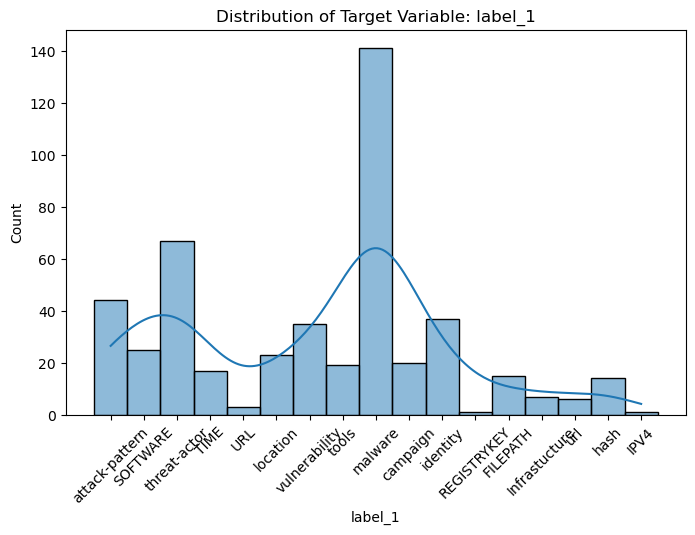

In [153]:

plt.figure(figsize=(8, 5))
sns.histplot(df['label_1'], kde=True)  
plt.title('Distribution of Target Variable: label_1')
plt.xticks(rotation=45)  
plt.show()

# Outlier Detection Using Box Plot

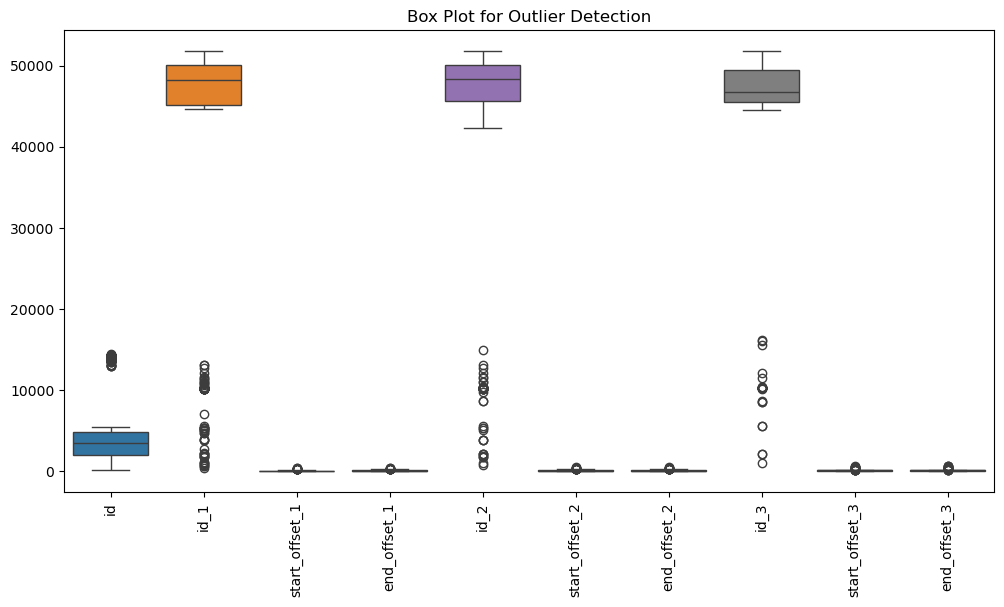

In [155]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=np.number))  # Use 'data=' instead of 'df='
plt.title('Box Plot for Outlier Detection')
plt.xticks(rotation=90)
plt.show()

# Multicollinearity Check Using VIF

In [157]:

numerical_cols = df.select_dtypes(include=[np.number]).columns
vif_df = pd.DataFrame()
vif_df["Feature"] = numerical_cols
vif_df["VIF"] = [variance_inflation_factor(df[numerical_cols].values, i) 
                   for i in range(len(numerical_cols))]

print("\nVIF Scores:")
print(vif_df)


VIF Scores:
          Feature         VIF
0              id    2.550897
1            id_1   17.252988
2  start_offset_1   62.797487
3    end_offset_1   74.176582
4            id_2   29.155703
5  start_offset_2   55.325118
6    end_offset_2   66.124265
7            id_3   20.293649
8  start_offset_3  143.268365
9    end_offset_3  166.142756


In [158]:
numeric_df = df.select_dtypes(include=[np.number])

In [159]:
corr_matrix = numeric_df.corr()

# Correlation Matrix and Heatmap

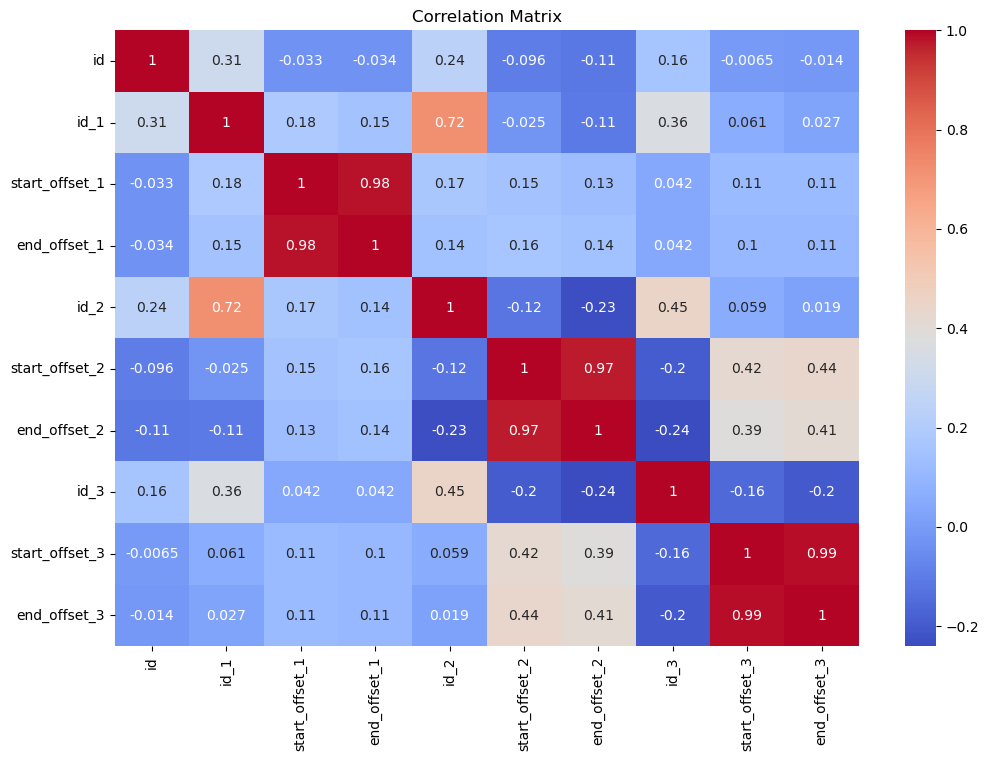

In [161]:

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pair Plot for Feature Interactions

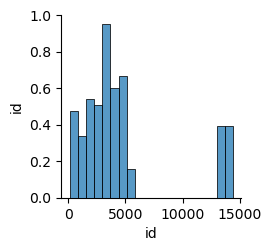

In [163]:
sns.pairplot(df.iloc[:, :5]) 
plt.show()

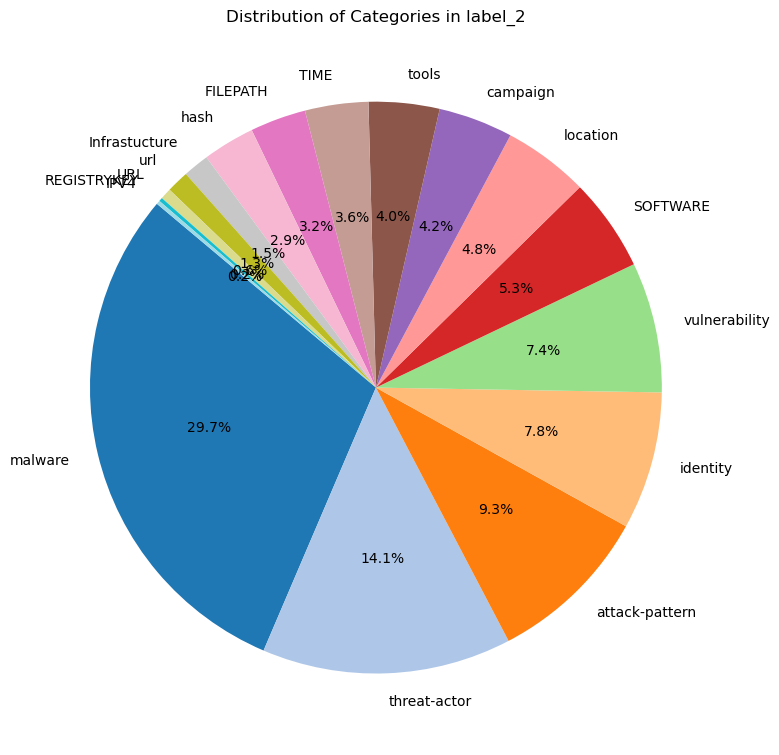

In [164]:

label_1_counts = df['label_1'].value_counts()

# Create a pie chart for the 'label_1' column
plt.figure(figsize=(8, 8))
label_1_counts.plot.pie(autopct='%1.1f%%', startangle=140, cmap='tab20', legend=False)
plt.title('Distribution of Categories in label_2')
plt.ylabel('') 
plt.tight_layout()
plt.show()



# pair plot

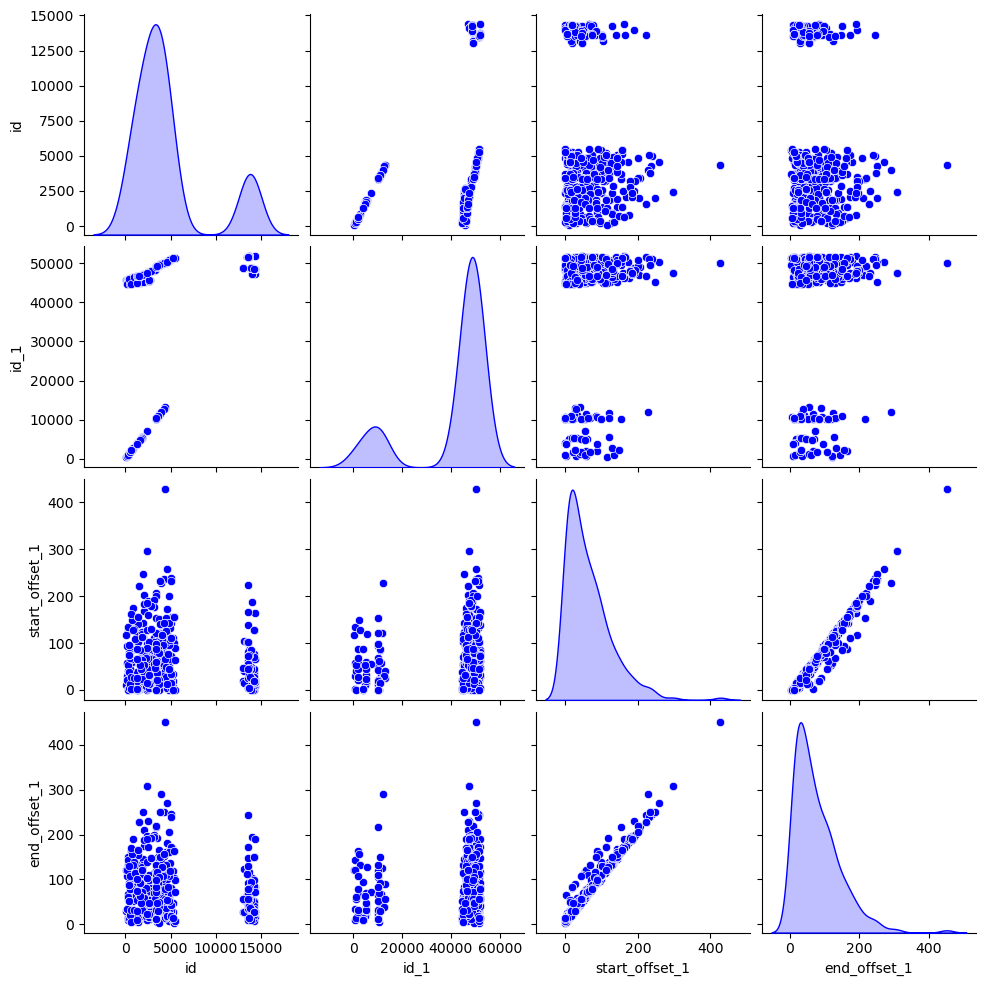

In [189]:
selected_columns = df.select_dtypes(include=['float64', 'int64']).iloc[:, :4]  # Selects the first 4 numerical columns

sns.pairplot(selected_columns, diag_kind='kde', plot_kws={'color': 'blue'}, diag_kws={'color': 'blue'})
plt.show()

# Feature Scaling (Normalization)

In [166]:
scaler = StandardScaler()
numeric_columns = df.select_dtypes(include=np.number)

scaled_df = scaler.fit_transform(numeric_columns)
scaled_df = pd.DataFrame(scaled_df, columns=numeric_columns.columns)
print(scaled_df.head())


         id      id_1  start_offset_1  end_offset_1      id_2  start_offset_2  \
0 -1.059306  0.225228       -0.983464     -0.946468  0.084607       -0.843433   
1  2.321763  0.464898       -0.871753     -0.931029  0.374731       -0.945241   
2  2.246494  0.480427        1.984870      1.801699  0.393528        1.861762   
3  2.151266  0.660210       -0.025937      0.026198  0.611159        1.818130   
4  2.334989  0.665902        1.585900      1.755382  0.617824       -0.174406   

   end_offset_2      id_3  start_offset_3  end_offset_3  
0     -0.785487 -0.090892       -0.668009     -0.720125  
1     -1.052101  0.340933       -0.586635     -0.653998  
2      1.656142  0.368911        1.542652      1.409149  
3      1.628077  0.692836        1.908835      1.792683  
4     -0.083869  0.703091        0.186418      0.060168  


In [167]:
df['interaction_term'] = df['id_1'] * df['id_2'] 
df['interaction_term']

0      1994202992
1      2355209430
2      2379634742
3      2671597656
4      2680961283
          ...    
471    2634050328
472    2191971942
473    2190316236
474    2248988352
475    2351037656
Name: interaction_term, Length: 475, dtype: int64

In [168]:
print(scaled_df.isna().sum())

id                0
id_1              0
start_offset_1    0
end_offset_1      0
id_2              0
start_offset_2    0
end_offset_2      0
id_3              0
start_offset_3    0
end_offset_3      0
dtype: int64


In [169]:
scaled_df = scaled_df.dropna()

In [170]:
scaled_df.fillna(scaled_df.mean(), inplace=True)

In [171]:
# Suppress specific UserWarning
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn.cluster._kmeans')

# Perform K-Means Clustering

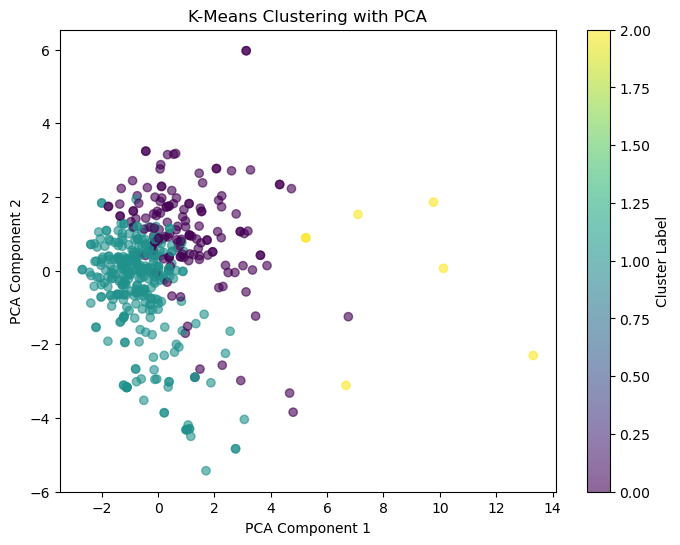

In [173]:
os.environ['OMP_NUM_THREADS'] = '2'


pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_result = pca.fit_transform(scaled_df)


kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_df)

# Step 3: Plotting
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title('K-Means Clustering with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [174]:
print(scaled_df.isnull().sum())

id                0
id_1              0
start_offset_1    0
end_offset_1      0
id_2              0
start_offset_2    0
end_offset_2      0
id_3              0
start_offset_3    0
end_offset_3      0
dtype: int64


In [175]:
imputer = SimpleImputer(strategy='mean')  # Choose appropriate strategy
scaled_df = imputer.fit_transform(scaled_df)
scaled_df


array([[-1.05930596e+00,  2.25227733e-01, -9.83464235e-01, ...,
        -9.08920223e-02, -6.68009336e-01, -7.20124694e-01],
       [ 2.32176258e+00,  4.64898213e-01, -8.71752751e-01, ...,
         3.40933143e-01, -5.86635314e-01, -6.53998181e-01],
       [ 2.24649413e+00,  4.80426683e-01,  1.98486950e+00, ...,
         3.68911490e-01,  1.54265158e+00,  1.40914904e+00],
       ...,
       [ 2.15006394e+00,  6.60024877e-01,  1.49609396e-01, ...,
        -4.59950180e-05, -3.45482688e-03, -5.95834691e-03],
       [-5.49740937e-01,  3.96412095e-01,  1.93699315e+00, ...,
        -4.59950180e-05, -3.45482688e-03, -5.95834691e-03],
       [ 2.31166266e+00,  4.62237958e-01,  1.02734249e+00, ...,
         3.35805637e-01,  9.14815315e-02,  2.04922585e-02]])

In [176]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)
pca_result


array([[-1.64856249e+00, -9.61559349e-01],
       [-2.24123548e+00,  2.48590174e-01],
       [ 3.27958685e+00,  2.73385161e+00],
       [ 2.77135235e+00,  1.53999428e+00],
       [ 7.09839095e-02,  2.75944423e+00],
       [-1.26672057e+00,  1.01576503e+00],
       [-7.00048921e-01, -6.72712337e-01],
       [-4.64180510e-01,  8.45804216e-01],
       [ 2.48715241e+00, -5.16793703e-02],
       [ 3.86606384e+00,  1.36898285e-01],
       [ 3.35252230e-01,  3.14813711e+00],
       [-6.45077746e-01, -1.61164669e-02],
       [-3.92859175e-01,  4.55912580e-02],
       [-2.07309914e+00, -1.96758008e-01],
       [ 3.18708260e+00,  1.07390907e+00],
       [ 7.04790266e-01,  6.22510510e-01],
       [-1.11218842e+00, -3.16951142e+00],
       [-2.69408176e-01, -3.43388556e-02],
       [-1.76892958e+00, -1.69942163e-01],
       [-1.21768773e+00,  2.77131606e-01],
       [ 2.30221893e+00, -4.30270961e-01],
       [ 1.19330793e-01, -8.40435867e-01],
       [-1.11159223e+00, -3.17096168e+00],
       [ 2.

In [177]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_df)
clusters


array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 0, 0,

# t-SNE for Visualizing High-Dimensional Data

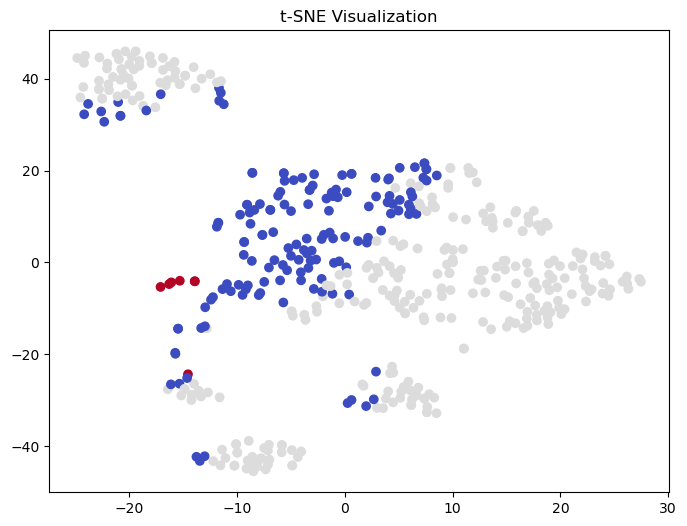

In [179]:

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(scaled_df)

plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=clusters, cmap='coolwarm')
plt.title('t-SNE Visualization')
plt.show()

# 3D Scatter Plot for Feature Interactions

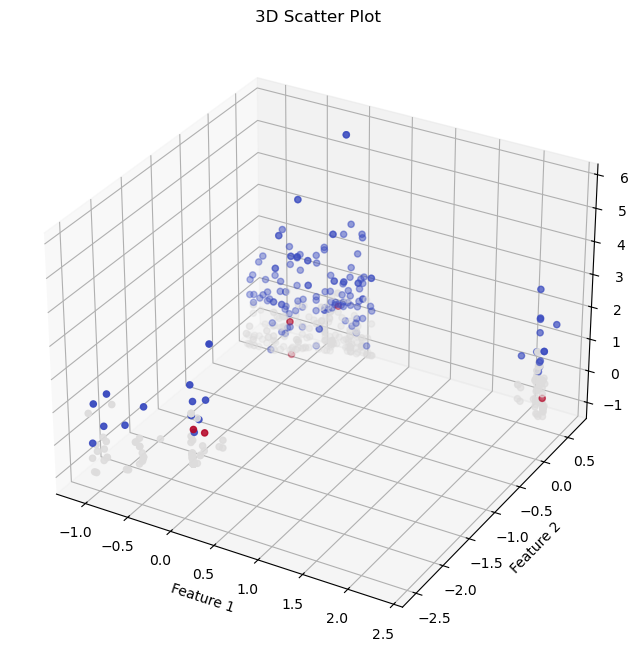

In [181]:

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scaled_df[:, 0], scaled_df[:, 1], scaled_df[:, 2], c=clusters, cmap='coolwarm')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.title('3D Scatter Plot')
plt.show()

In [182]:
important_features = corr_matrix['id_1'].abs().sort_values(ascending=False).head(5).index
print(f"Top 5 Important Features: {important_features}")

Top 5 Important Features: Index(['id_1', 'id_2', 'id_3', 'id', 'start_offset_1'], dtype='object')


# chi-square statistic and p-value

In [200]:
from scipy.stats import chi2_contingency

if 'solutions' in df.columns:
   
    df['solutions'] = df['solutions'].fillna('').astype(str)  # Replace NaN with empty strings and convert to str

  
    vectorizer = CountVectorizer(max_features=20, stop_words='english')
    solution_matrix = vectorizer.fit_transform(df['solutions'])
    solution_terms = vectorizer.get_feature_names_out()

    solution_df = pd.DataFrame(solution_matrix.toarray(), columns=solution_terms)
    solution_df['Threat Label'] = df['label_1']

    term_by_label = solution_df.groupby('Threat Label').sum()
    contingency_table = term_by_label.values 

    contingency_table = contingency_table[
        ~np.all(contingency_table == 0, axis=1) 
    ]
    contingency_table = contingency_table[
        :, ~np.all(contingency_table == 0, axis=0) 
    ]

    if contingency_table.size > 0:

        chi2, p, dof, expected = chi2_contingency(contingency_table)

        print("### Results ###")
        print(f"Chi-square Statistic: {chi2:.2f}")
        print(f"P-value: {p:.4f}")
        print(f"Degrees of Freedom: {dof}\n")
        print("Interpretation:")
        if p < 0.05:
            print("The result is statistically significant: the solutions differ based on the threat label.")
        else:
            print("The result is not statistically significant: the solutions do not differ based on the threat label.")
    else:
        print("The contingency table is empty after removing zero rows/columns.")
else:
    print("The column 'solutions' is not present in the DataFrame.")


### Results ###
Chi-square Statistic: 205.00
P-value: 0.2165
Degrees of Freedom: 190

Interpretation:
The result is not statistically significant: the solutions do not differ based on the threat label.


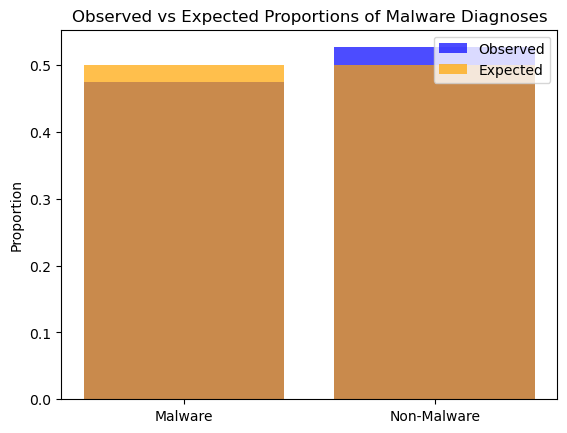

Chi-square statistic: 1.3157894736842106
p-value: 0.2513491088102194


In [196]:
from scipy.stats import chisquare 

df['diagnosis_cleaned'] = df['diagnosis'].str.contains("malware", case=False, na=False)
counts = df['diagnosis_cleaned'].value_counts()

observed = [counts.get(True, 0), counts.get(False, 0)]

expected = [len(df) * 0.5, len(df) * 0.5]

chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

categories = ['Malware', 'Non-Malware']
observed_proportions = [o / sum(observed) for o in observed]
expected_proportions = [e / sum(expected) for e in expected]

plt.bar(categories, observed_proportions, alpha=0.7, label='Observed', color='blue')
plt.bar(categories, expected_proportions, alpha=0.7, label='Expected', color='orange')
plt.title('Observed vs Expected Proportions of Malware Diagnoses')
plt.ylabel('Proportion')
plt.legend()
plt.show()

print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)


In [198]:
# Categorical Data Handling
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

print("\nCategorical Data Transformed Successfully.")


Categorical Data Transformed Successfully.
